<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, make_scorer, accuracy_score
from sklearn.dummy import DummyRegressor

C:\Users\Games\AppData\Local\Temp\ipykernel_128792\2129766358.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
np.random.seed(0)
RANDOM_STATE=12345
CV=5

In [3]:
display(HTML("<style>.container { width:88% !important; }</style>"))

In [4]:
try:
    forsen_train = pd.read_csv('C:/Users/Games/Downloads/gold_industry_train.csv')
except: 
    forsen_train = pd.read_csv('/datasets/gold_industry_train.csv')

In [5]:
try:
    forsen_test = pd.read_csv('C:/Users/Games/Downloads/gold_industry_test.csv')
except: 
    forsen_test = pd.read_csv('/datasets/gold_industry_test.csv')

In [6]:
try:
    forsen_full = pd.read_csv('C:/Users/Games/Downloads/gold_industry_full.csv')
except: 
    forsen_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [7]:
forsens = [forsen_train, forsen_test, forsen_full]

In [8]:
def information(dataframe):
    data_info = dataframe.info()
    data_head = display(dataframe.head())
    return data_info, data_head
for df in forsens:
    lol = information(df)
    print(lol)
    print('-------------------------------------------------------------------')
    print('-------------------------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


(None, None)
-------------------------------------------------------------------
-------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.i

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


(None, None)
-------------------------------------------------------------------
-------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


(None, None)
-------------------------------------------------------------------
-------------------------------------------------------------------


In [9]:
forsen_train.shape, forsen_test.shape, forsen_full.shape

((14579, 87), (4860, 53), (19439, 87))

Посмотрим на различие признаков в тестовой и обучающей выборках.

In [10]:
set(forsen_train.columns) - set(forsen_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке отсутствуют целевые признаки output и признаки расчёта calculation для этапа флотации.

Проверим что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака. Опишем выводы.

In [11]:
def recovery(C, F, T):
    
    numerator = (C*(F-T))
    denominator =(F*(C-T))
    
    REC = numerator/denominator * 100
    
    return REC

In [12]:
t,f,c = forsen_train['rougher.output.tail_au'], forsen_train['rougher.input.feed_au'], forsen_train['rougher.output.concentrate_au']
rec = recovery(c, f, t)
right_recovery_sum = np.isclose(forsen_train['rougher.output.recovery'], rec).sum()
right_recovery_sum, forsen_train.shape[0]-right_recovery_sum

(14579, 0)

In [13]:
rec.describe()

count    14579.000000
mean        82.521200
std         15.797521
min         -0.000000
25%         80.558542
50%         85.946497
75%         89.960375
max        100.000000
dtype: float64

In [14]:
mae = mean_absolute_error(forsen_train['rougher.output.recovery'], rec)
print(mae)

9.83758577644259e-15


Как мы видим средняя абсолютная ошибка достаточно мала, считаем, что recovery посчитан верно.

In [16]:
def show_na(df):
    na_info = (df.isna() | df.isnull()).sum()
    res = (pd.concat([na_info / df.shape[0], na_info], axis=1,  keys=['percent', 'abs'])
           .sort_values('percent', ascending=False))
    return res


show_na(forsen_train).head(10)

,percent,abs
secondary_cleaner.output.tail_sol,0.063104,920
rougher.state.floatbank10_e_air,0.029426,429
rougher.input.floatbank11_xanthate,0.027917,407
primary_cleaner.output.concentrate_sol,0.018177,265
final.output.concentrate_sol,0.013170,192
rougher.input.feed_size,0.006928,101
secondary_cleaner.state.floatbank2_a_air,0.006448,94
primary_cleaner.output.concentrate_pb,0.006036,88
rougher.input.feed_sol,0.005282,77
final.output.tail_pb,0.005144,75


In [17]:
show_na(forsen_train)['abs'].sum()/forsen_train.shape[0]

0.20920502092050208

In [18]:
show_na(forsen_test).head(10)

,percent,abs
secondary_cleaner.state.floatbank2_a_air,0.025926,126
rougher.input.floatbank11_xanthate,0.009465,46
rougher.input.feed_size,0.009053,44
primary_cleaner.input.xanthate,0.008848,43
rougher.input.feed_pb,0.005761,28
rougher.input.feed_sol,0.004527,22
primary_cleaner.input.depressant,0.001852,9
rougher.input.floatbank11_sulfate,0.001646,8
rougher.state.floatbank10_e_air,0.001440,7
rougher.input.feed_rate,0.000823,4


In [19]:
show_na(forsen_test)['abs'].sum()/forsen_test.shape[0]

0.07716049382716049

Пропуски в целом незначительны, разве что в тренировочной выборке 6% в целевом признаке, 920 пропусков secondary_cleaner.output.tail_sol. Однако в целом пропусков в трен. датафрейме - 21%, в тестовом - 7,7%.

In [20]:
for i in forsens:
    i.fillna(method='ffill', inplace=True)

In [21]:
show_na(forsen_test).head(10), show_na(forsen_train).head(10), show_na(forsen_full).head(10)

(                                            percent  abs
 date                                            0.0    0
 primary_cleaner.state.floatbank8_a_air          0.0    0
 primary_cleaner.state.floatbank8_b_air          0.0    0
 primary_cleaner.state.floatbank8_b_level        0.0    0
 primary_cleaner.state.floatbank8_c_air          0.0    0
 primary_cleaner.state.floatbank8_c_level        0.0    0
 primary_cleaner.state.floatbank8_d_air          0.0    0
 primary_cleaner.state.floatbank8_d_level        0.0    0
 secondary_cleaner.state.floatbank2_a_air        0.0    0
 secondary_cleaner.state.floatbank2_a_level      0.0    0,
                                             percent  abs
 date                                            0.0    0
 primary_cleaner.output.tail_sol                 0.0    0
 secondary_cleaner.state.floatbank3_b_level      0.0    0
 secondary_cleaner.state.floatbank3_b_air        0.0    0
 secondary_cleaner.state.floatbank3_a_level      0.0    0
 secondary_cl

С пропусками разобрались, используя метод 'ffill'. Удалим из тренировочной выборки признаки, которых нет в тестовой.

In [22]:
display(forsen_train.head())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


Для определения целевых признаков создадим доп. датасет на базе test путём объединения двух датасетов с помощью метода merge.

In [23]:
forsen_test_target = pd.merge(
    forsen_test,
    forsen_full[['date', 'rougher.output.recovery', 'final.output.recovery']],
    on='date',
    how='left')

In [24]:
display(forsen_test_target.head())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575,89.514960,70.281454
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126,65.523246
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155,91.816623,74.817644
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973,88.478959,63.082720
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805,89.230316,74.463380


Определим признаки для дальнейшего обучения и тестирования моделей.

In [25]:
forsen_train_features = forsen_train[forsen_test.columns]

In [26]:
rougher_cols = forsen_train_features.columns.str.contains('rougher')
forsen_train_features_rougher = forsen_train_features.loc[:, rougher_cols]
forsen_test_features_rougher = forsen_test.loc[:, rougher_cols]
forsen_train_target_rougher = forsen_train['rougher.output.recovery']
forsen_test_target_rougher = forsen_test_target['rougher.output.recovery']

final_cols = forsen_train_features.columns.str.contains('cleaner') + forsen_train_features.columns.str.contains('rougher')
forsen_train_features_cleaner = forsen_train_features.loc[:, final_cols]
forsen_test_features_cleaner = forsen_test.loc[:, final_cols]
forsen_train_target_cleaner = forsen_train['final.output.recovery']
forsen_test_target_cleaner = forsen_test_target['final.output.recovery']

## Анализ данных

Построим распределения концентраций металлов на выходе каждого процесса и в хвостах.

In [27]:
def drop_zeros(y):
    y = y[(y != 0).all(1)]
    return y

In [28]:
forsen_train = drop_zeros(forsen_train)

In [29]:
forsen_train.shape

(13107, 87)

C:\Users\Games\anaconda3\envs\ds_practicum_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Games\anaconda3\envs\ds_practicum_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Games\anaconda3\envs\ds_practicum_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

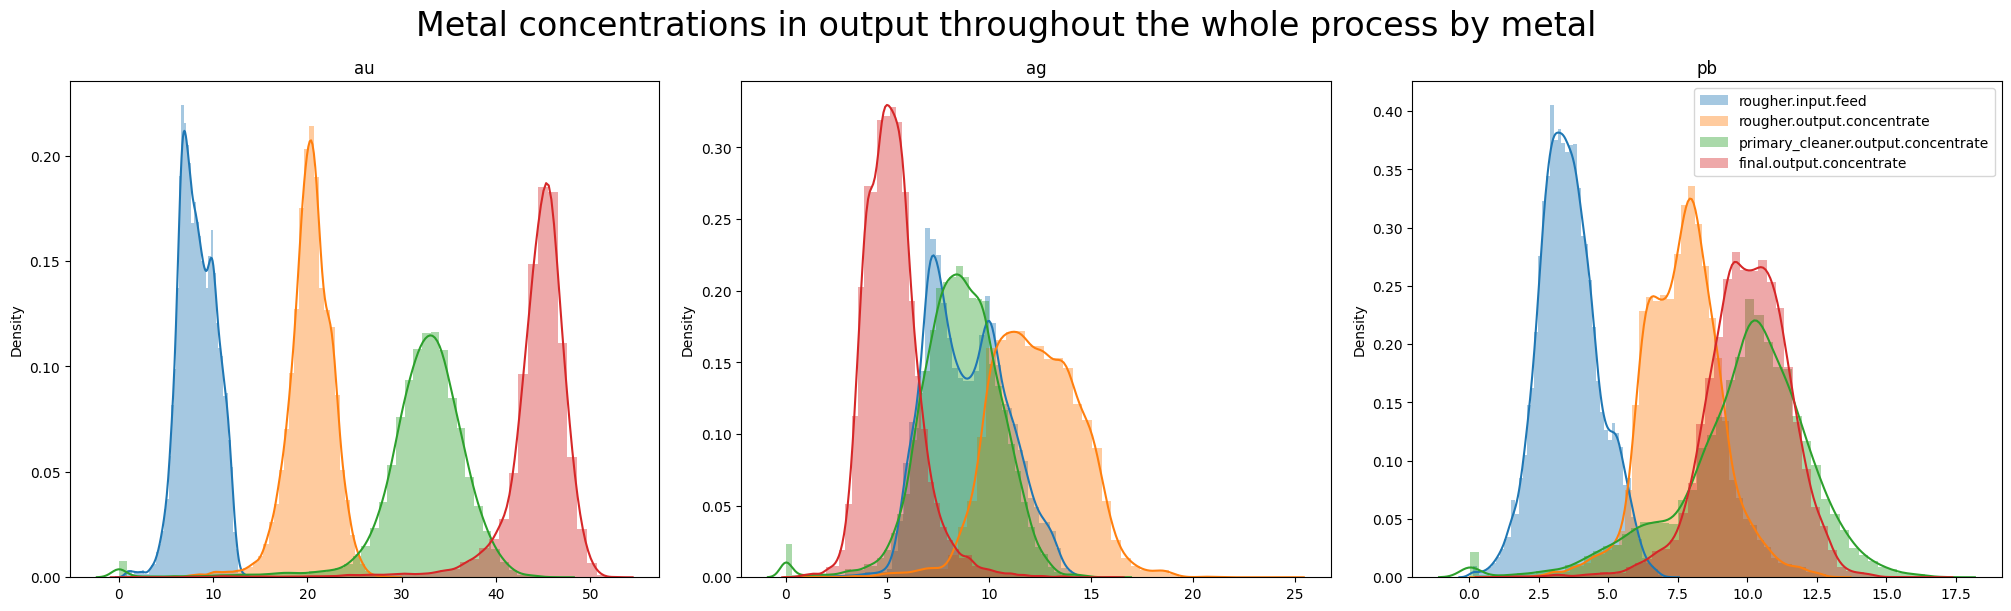

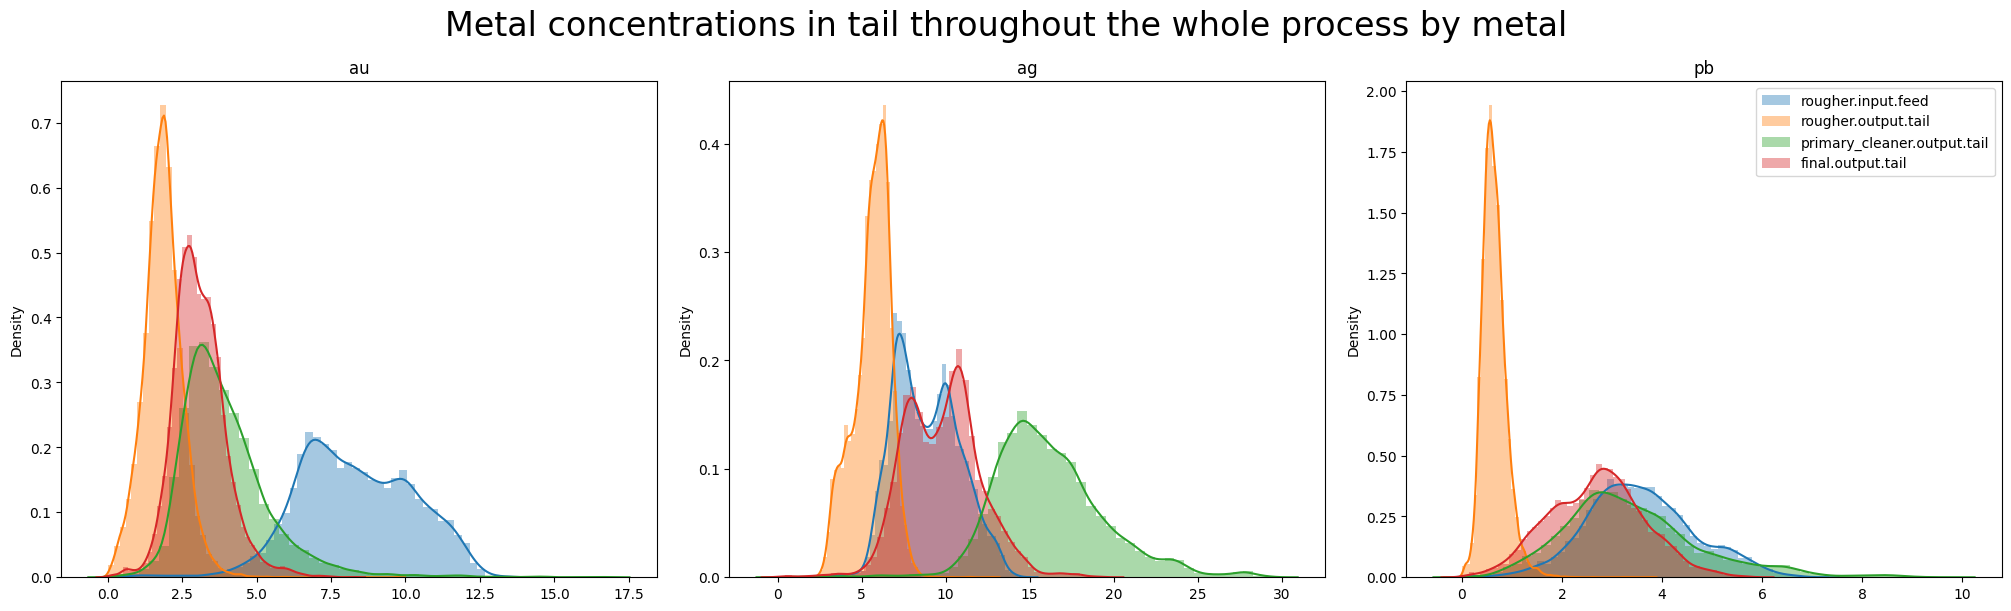

In [30]:
process = ['rougher.input.feed',
           'rougher.output.concentrate',
           'primary_cleaner.output.concentrate',
           'final.output.concentrate']

process_tail = ['rougher.input.feed',
                'rougher.output.tail',
                'primary_cleaner.output.tail',
                'final.output.tail']

metals = ['au', 'ag', 'pb']

fig, axs = plt.subplots(1, len(metals), figsize=(20, 6), constrained_layout=True)
fig.suptitle('Metal concentrations in output throughout the whole process by metal', fontsize=24)

for metal, ax in zip(metals, axs):
    ax.set_title(metal)
    for stage in process:        
        cols = forsen_train.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(forsen_train.loc[:, cols], label=stage, ax=ax)    
plt.legend()


fig, axs = plt.subplots(1, len(metals), figsize=(20, 6), constrained_layout=True)
fig.suptitle('Metal concentrations in tail throughout the whole process by metal', fontsize=24)

for metal, ax in zip(metals, axs):
    ax.set_title(metal)
    for stage in process_tail:        
        cols = forsen_train.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(forsen_train.loc[:, cols], label=stage, ax=ax)    
plt.legend()

plt.show()

Из графиков видно что в процессе очистики концентрация золота возрастает, особенно после флотации. После вторичной очистки концентрация золота уже в два раза выше. Другие металлы не усиливают концентрацию на последующих этапах очистки. 

Так же отметим различную концентрацию металлов в хвостовых отвалах после различных этапов. Концентрация золота в хвостах после флотации при последующей очистке немного увеличивается. Тоже самое характерно для других металлов. На финальном этапе концентрация серебра в хвостах уменьшается по сравнению с пред. этапом, а концентрация свинца остаётся неизменной.

Теперь сравним размер гранул исходного сырья тестовой и обучающей выборок, если он будет различаться, это может плохо повлиять на обучение и предсказание модели.

C:\Users\Games\anaconda3\envs\ds_practicum_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Games\anaconda3\envs\ds_practicum_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


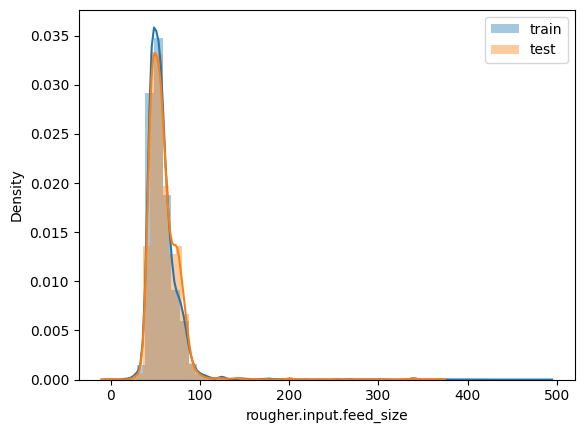

In [31]:
sns.distplot(forsen_train['rougher.input.feed_size'], label='train')
sns.distplot(forsen_test['rougher.input.feed_size'], label='test')
plt.legend()
plt.show()

Распределение размера гранул исходного сырья равномерное в обеих выборках.  \
Посмотрим на суммарное распределение металлов на различных этапах обработки.

C:\Users\Games\anaconda3\envs\ds_practicum_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Games\anaconda3\envs\ds_practicum_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Games\anaconda3\envs\ds_practicum_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

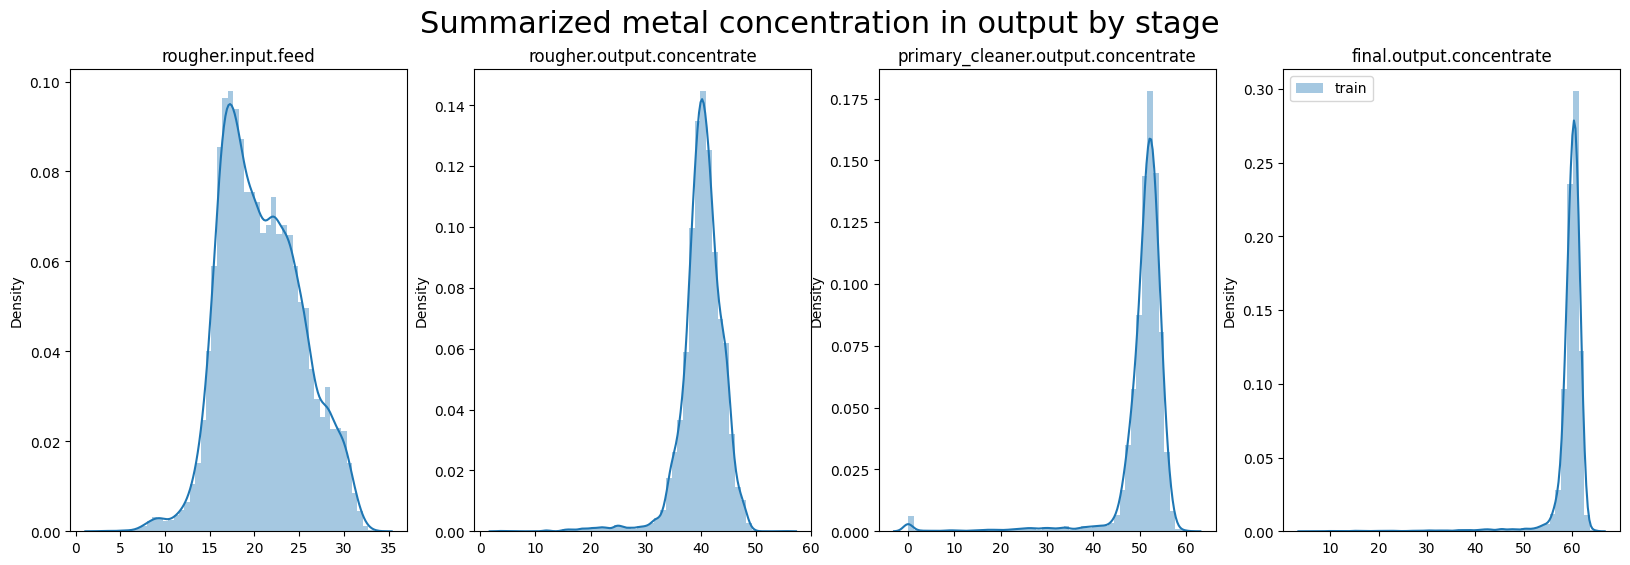

In [32]:
fig, axs = plt.subplots(1, len(process), figsize=(20, 6))
fig.suptitle('Summarized metal concentration in output by stage', fontsize=22)

for stage, ax in zip(process, axs):
    ax.set_title(stage)
    sum_train = forsen_train[stage+'_au'] + forsen_train[stage+'_pb'] + forsen_train[stage+'_ag']
    sns.distplot(sum_train, label='train', ax=ax)
    
plt.legend()
plt.show()

Суммарная концентрация металлов увеличивается с каждым пройденным этапом очистки. Пик после флотации приходится на 40, после первичной очистки на 50, после вторичной на финальном этапе на 60.

## Модель

Напишем формулу расчёта sMAPE.

In [33]:
def sMAPE(y_true, y_pred):

    numerator = np.abs(y_true-y_pred)
    denominator =(np.abs(y_true)+np.abs(y_pred))/2

    output_errors = np.divide(numerator, denominator)


    output_scores = output_errors.mean()

    return output_scores * 100


neg_smape = make_scorer(sMAPE, greater_is_better=False)

С помощью словаря с моделями и параметрами и GridSearchCV определим наилучшие модели с гиперпараметрами для предсказания rougher и cleaner (final) величин, а также таким образом будет сделана кросс-валидация. Для получения верной оценки sMAPE умножим при выводе на -1.  
Сразу же обучим в цикле модели и сделаем предсказания. Массив с предсказаниями модели с наименьшей ошибкой вынесем в отдельную переменную.


In [34]:
models = {
    'Decision Tree': (DecisionTreeRegressor(), {'max_depth': [None, 10, 15],
                                                'random_state': [RANDOM_STATE]
                                               }),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [100, 150],
                                                'max_depth': [None, 10, 15],
                                                'random_state': [RANDOM_STATE],
                                               }),
    'Linear Regression': (LinearRegression(), {}),
    'Dummy Regressor': (DummyRegressor(), {'strategy': ['mean']
                                          })
}

best_rougher_smape = 0

for model_name, (model, params) in models.items():
    grid_rougher = GridSearchCV(estimator=model, param_grid=params, cv=CV, scoring=neg_smape, n_jobs=-1)
    grid_rougher.fit(forsen_train_features_rougher, forsen_train_target_rougher)
    
    smape_rougher_test = sMAPE(forsen_test_target_rougher, grid_rougher.best_estimator_.predict(forsen_test_features_rougher))
    
    print(f"Лучшие параметры {model_name}:")
    print(grid_rougher.best_params_)
    score_rougher = -grid_rougher.best_score_
    print("Лучшая оценка sMAPE:")
    print(-grid_rougher.best_score_)
    print("Лучшая оценка смапе на тест выборке:")
    print(smape_rougher_test)
    print(grid_rougher.best_estimator_)
    print()
    print(grid_rougher.best_estimator_.predict(forsen_test_features_rougher))
    if score_rougher < 13:
        best_rougher_smape += smape_rougher_test

Лучшие параметры Decision Tree:
{'max_depth': 10, 'random_state': 12345}
Лучшая оценка sMAPE:
18.24145826914335
Лучшая оценка смапе на тест выборке:
5.618876802684324
DecisionTreeRegressor(max_depth=10, random_state=12345)

[88.19102805 88.19102805 90.87271982 ... 80.20727388 80.20727388
 80.20727388]
Лучшие параметры Random Forest:
{'max_depth': 10, 'n_estimators': 150, 'random_state': 12345}
Лучшая оценка sMAPE:
13.951433414770872
Лучшая оценка смапе на тест выборке:
4.689686552060838
RandomForestRegressor(max_depth=10, n_estimators=150, random_state=12345)

[90.30989551 90.294258   90.08629728 ... 81.75270677 81.11985617
 80.98612664]
Лучшие параметры Linear Regression:
{}
Лучшая оценка sMAPE:
12.795377234651122
Лучшая оценка смапе на тест выборке:
6.241202976561615
LinearRegression()

[97.45750505 97.72936738 95.76109606 ... 85.20994723 84.48782299
 84.46512214]
Лучшие параметры Dummy Regressor:
{'strategy': 'mean'}
Лучшая оценка sMAPE:
13.301677114521652
Лучшая оценка смапе на тес

In [35]:
best_cleaner_smape = 0

for model_name, (model, params) in models.items():
    grid_cleaner = GridSearchCV(estimator=model, param_grid=params, cv=CV, scoring=neg_smape, n_jobs=-1)
    grid_cleaner.fit(forsen_train_features_cleaner, forsen_train_target_cleaner)
    
    smape_cleaner_test = sMAPE(forsen_test_target_cleaner, grid_cleaner.best_estimator_.predict(forsen_test_features_cleaner))
    
    print(f"Лучшие параметры {model_name}:")
    print(grid_cleaner.best_params_)
    score_cleaner = -grid_cleaner.best_score_
    print("Лучшая оценка sMAPE:")
    print(-grid_cleaner.best_score_)
    print("Лучшая оценка смапе на тест выборке:")
    print(smape_cleaner_test)
    print(grid_cleaner.best_estimator_)
    print()
    print(grid_cleaner.best_estimator_.predict(forsen_test_features_cleaner))
    if score_cleaner < 11.4:
        best_cleaner_smape += smape_cleaner_test

Лучшие параметры Decision Tree:
{'max_depth': 10, 'random_state': 12345}
Лучшая оценка sMAPE:
17.20379060126997
Лучшая оценка смапе на тест выборке:
8.15447572945037
DecisionTreeRegressor(max_depth=10, random_state=12345)

[66.46911991 66.46911991 66.46911991 ... 69.94524216 69.94524216
 66.25523701]
Лучшие параметры Random Forest:
{'max_depth': 10, 'n_estimators': 150, 'random_state': 12345}
Лучшая оценка sMAPE:
11.468063191954794
Лучшая оценка смапе на тест выборке:
7.024885964408667
RandomForestRegressor(max_depth=10, n_estimators=150, random_state=12345)

[66.14806314 66.76010702 68.49169626 ... 68.32320557 67.98874093
 68.30323849]
Лучшие параметры Linear Regression:
{}
Лучшая оценка sMAPE:
11.169089731769196
Лучшая оценка смапе на тест выборке:
8.359881040974901
LinearRegression()

[67.78367772 69.45878879 67.54362925 ... 66.32483004 66.34149325
 65.51322042]
Лучшие параметры Dummy Regressor:
{'strategy': 'mean'}
Лучшая оценка sMAPE:
11.509672223391595
Лучшая оценка смапе на тест

В итоге получаем, что лучшая модель для обоих случаев - **линейная регрессия.** Лучшая оценка в первом случае составила 12,80, во втором случае - 11,17. Также посчитали sMAPE rougher и cleaner на тестовой выборке по моделям, вынесли значения при лучших результатах на тренировочной выборке в отдельные переменные. По итогу и rougher и cleaner sMAPE на тестовой выборке получились ниже, чем на тренировочной - 6,24 и 8,36 соответственно. Одновременно проверили модель на вменяемость, использовав DummyRegressor, в обоих случаях ошибка на константной модели выше, а значит наша модель лучше.

In [36]:
final_smape = 0.25*best_rougher_smape + 0.75*best_cleaner_smape
final_smape

7.830211524871579

**Итоговая sMAPE составила 7,83.**

На всякий случай посчитаем итоговую sMAPE для DummyRegressor, по значениям, которые получились при расчётах ранее.

In [37]:
final_dummy_smape = 0.25*7.14 + 0.75*9.41
final_dummy_smape

8.8425

Ошибка выше, наша модель лучше.